In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.2 MB 4.2 MB/s eta 0:01:33
   ---------------------------------------- 0.8/390.2 MB 2.8 MB/s eta 0:02:19
   ---------------------------------------- 1.3/390.2 MB 2.1 MB/s eta 0:03:06
   ---------------------------------------- 1.6/390.2 MB 1.9 MB/s eta 0:03:29
   ---------------------------------------- 1.8/390.2 MB 1.8 MB/s eta 0:03:40
   ---------------------------------------- 2.1/390.2 MB 1.8 MB/s eta 0:03:42
   ---------------------------------------- 2.4/390.2 MB 1.6 MB/s eta 0:03:57
   ---------------------------------------- 2.6/390.2 MB 1.6 MB/s eta 0:04:07
   ---------------------------------------- 2.9/390.2 MB 1.5 MB/s eta 0:04:26
   ---------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("../data/train.csv")

# Set 'id' as the date index
df['id'] = pd.to_datetime(df['id'])
df.set_index('id', inplace=True)



In [11]:
# Select column to predict
data = df[['valeur_NO2']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)



In [12]:
# Create sequences
def create_sequences(data, window_size=30):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(scaled_data, window_size)

# Split data
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



In [13]:
# Build the model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))



C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: nan - val_loss: nan
Epoch 2/10
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: nan - val_loss: nan
Epoch 3/10
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: nan - val_loss: nan
Epoch 4/10
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: nan - val_loss: nan
Epoch 5/10
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: nan - val_loss: nan
Epoch 6/10
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: nan - val_loss: nan
Epoch 7/10
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: nan - val_loss: nan
Epoch 8/10
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: nan - val_loss: nan
Epoch 9/10
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: nan - val_loss: nan
Epoch 10/10
2048/2048 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: nan - val_loss: nan


257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
X_test ka shape (8193, 30, 1)


array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

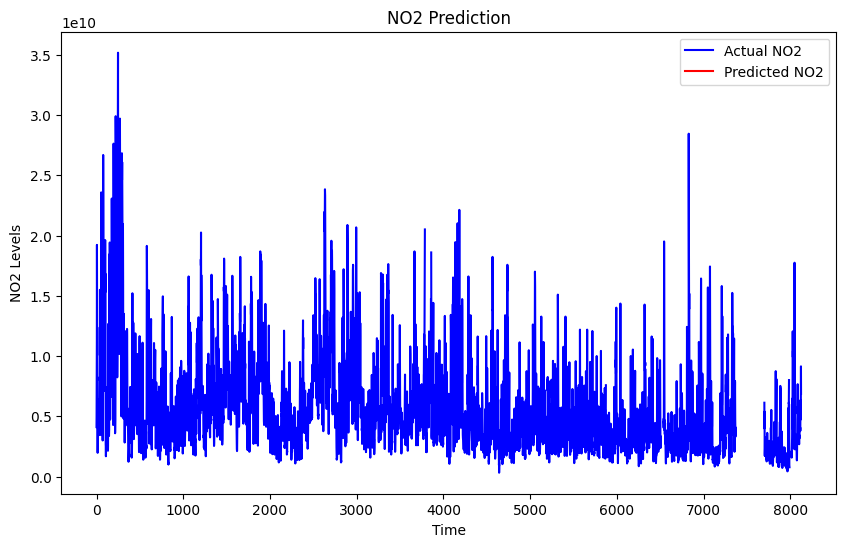

In [18]:
# Predictions
y_pred = model.predict(X_test)

print("X_test ka shape", X_test.shape)
display(y_pred)

# Inverse transform predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Plot
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual NO2')
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted NO2')
plt.title('NO2 Prediction')
plt.xlabel('Time')
plt.ylabel('NO2 Levels')
plt.legend()
plt.show()

In [19]:
!pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB 6.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.9 MB 5.3 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.9 MB 4.3 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/9.9 MB 4.5 MB/s eta 0:00:02
   --------------- ------------------------ 3.9/9.9 MB 4.1 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.9 MB 3.9 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.9 MB 3.7 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.9 MB 3.7 MB/s eta 0:00:02
   --------------------------- ------------ 6.8/9.9 MB 3.6 MB/s eta 0:00:01
   -------------------------------- ------- 8.1/9.9 MB 3.8 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.9 MB 4.0 MB/s eta 0:00:01
   --------------

In [21]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load your data into a DataFrame (Assuming your dataset is in CSV format)
# df = pd.read_csv('your_data.csv')  # Uncomment and adjust if loading from a CSV
# Sample data:
# Date in 'id' column, pollutants in 'valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25' columns

# Load your data
df = pd.read_csv("../data/train.csv")

# Convert 'id' to datetime and set as index
df['id'] = pd.to_datetime(df['id'])
df.set_index('id', inplace=True)

# Select the target pollutant for prediction, e.g., NO2
target_column = 'valeur_NO2'

# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(0.8 * len(df))
train, test = df[target_column][:train_size], df[target_column][train_size:]

# Define and fit the ARIMA model
# p, d, q values can be chosen based on preliminary analysis or left as default for simplicity
model = ARIMA(train, order=(1, 1, 1))  # Basic ARIMA(1, 1, 1) model, change as needed
fitted_model = model.fit()

# Forecast on the test set
forecast = fitted_model.forecast(steps=len(test))

# Evaluate using Mean Absolute Error (MAE)
mae = mean_absolute_error(test, forecast)
print(f"Mean Absolute Error: {mae}")

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.xlabel('Date')
plt.ylabel(target_column)
plt.title(f'{target_column} Prediction using ARIMA')
plt.legend()
plt.show()


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


ValueError: Input contains NaN.

In [43]:
# Load your data
df_train = pd.read_csv("../data/train.csv")
df_train["hdatetime"] = df_train["id"]


df = pd.read_csv("../data/comptage-multimodal-comptages.csv")

# Convert the 'Date et heure de comptage' column to datetime format
df['hdatetime'] = pd.to_datetime(df['hdatetime'], errors='coerce', utc=True)

# Handle any parsing errors (optional)
if df['hdatetime'].isnull().any():
    print("Warning: Some dates could not be parsed.")
    print(df[df['hdatetime'].isnull()])  # Display rows with parsing errors for troubleshooting

# Convert datetime to the desired string format "yyyy-MM-dd HH"
df['hdatetime'] = df['hdatetime'].dt.strftime('%Y-%m-%d %H')

# Aggregate vehicle_count grouped by formatted hdatetime and vehicle_type
df = df.groupby(['hdatetime', 'vehicle_type'], as_index=False)['vehicle_count'].sum()

pivoted_df = df.pivot(index="hdatetime", columns="vehicle_type", values="vehicle_count").reset_index()
pivoted_df = pivoted_df.fillna(0)

# Display the result
# print(pivoted_df)
# pivoted_df.to_csv("vehicles.csv", index=False)

# Perform an inner join on `hdatetime`
result = pd.merge(df_train, pivoted_df, on='hdatetime', how='left')
print(result)



                  id  valeur_NO2  valeur_CO  valeur_O3  valeur_PM10  \
0      2020-01-01 00        42.9      0.718       15.7         73.1   
1      2020-01-01 01        33.6      0.587       10.1         74.8   
2      2020-01-01 02        29.3        NaN        5.1         51.0   
3      2020-01-01 03        30.5      0.246        7.2         27.7   
4      2020-01-01 04        29.3      0.204        8.3         15.3   
...              ...         ...        ...        ...          ...   
40986  2024-09-03 18         NaN      0.222       55.1         12.0   
40987  2024-09-03 19         NaN      0.245       48.2         13.4   
40988  2024-09-03 20         NaN      0.234       44.5         12.4   
40989  2024-09-03 21         NaN      0.225       25.9         10.6   
40990  2024-09-03 22         NaN      0.184       37.7          8.5   

       valeur_PM25      hdatetime  2_wheeler_motor  4_wheeler_motor  \
0             64.4  2020-01-01 00              NaN              NaN   
1    

In [44]:
result.to_csv("vehicles.csv", index=False)